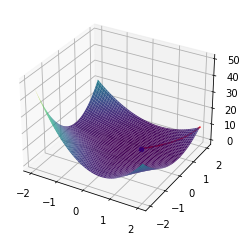

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 定义函数
def f(x, y):
    return (x**2 - x + 1)*(y**2 - y + 1)

# 计算梯度
def gradient(x, y):
    f_x = (2*x - 1)*(y**2 - y + 1) + (x**2 - x + 1)*(2*y - 1)
    f_y = (2*y - 1)*(x**2 - x + 1) + (y**2 - y + 1)*(2*x - 1)
    return np.array([f_x, f_y])

# 梯度下降算法
def gradient_descent(initial_point, learning_rate=0.01, num_iterations=100):
    x, y = initial_point
    points = [(x, y)]
    for _ in range(num_iterations):
        grad = gradient(x, y)
        x -= learning_rate * grad[0]
        y -= learning_rate * grad[1]
        points.append((x, y))
    return points

# 初始点
initial_point = (2, 2)

# 执行梯度下降
points = gradient_descent(initial_point)

# 绘制函数
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# 绘制梯度下降路径
path_x, path_y = zip(*points)
ax.plot(path_x, path_y, f(np.array(path_x), np.array(path_y)), color='r')

# 标出最小值点
min_x, min_y = points[-1]
ax.scatter(min_x, min_y, f(min_x, min_y), color='b')

plt.show()